# Flight Price Prediction

---

dataset link : https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh/

In This dataset we have many features
- Airline Name
- Date of Journey
- Source and Destination
- Route and total stopes
- Departure time
- Arrival time
- duration 
- Price

Our goal is to find out the price of flight

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/flight.csv')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

here, Date of journey, dep_time and arrival_time are object type. 

we have to separate the journey_month and journey_day from the date_of_journey column.

In the Dep_time, Arrival_time we have to separate a dep_hour, dep_min, arrival_hour, arrival_min.

In [8]:
# separate journey day and month from journey_date
data['Journey_day'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day
data['Journey_month'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month

# separate dep hour and min from Dep_time
data['Dep_hour'] = pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_min'] = pd.to_datetime(data.Dep_Time).dt.minute

# separate arrival hour and min from arrival_time
data['Arrival_hour'] = pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_min'] = pd.to_datetime(data.Arrival_Time).dt.minute

In Duration column, we have to remove units like m or h so it makes duration column object type

In [9]:
duration = list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
for i in range(len(duration)):
    h_min = int(duration[i].split('h')[0]) * 60
    min = int(duration[i].split(sep = "m")[0].split()[-1]) + h_min
    duration[i] = min
    
data['Duration'] = duration

In [10]:
# replace the values of total steps

data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [11]:
# Date_of_Journey, Dep_Time, Arrival_Time we do not need and additional info column has around 80% no info value
# route and total stops are same 

df = data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Route', 'Additional_Info'], axis=1)

In [12]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,16,50,21,35


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


<AxesSubplot:xlabel='Airline', ylabel='Price'>

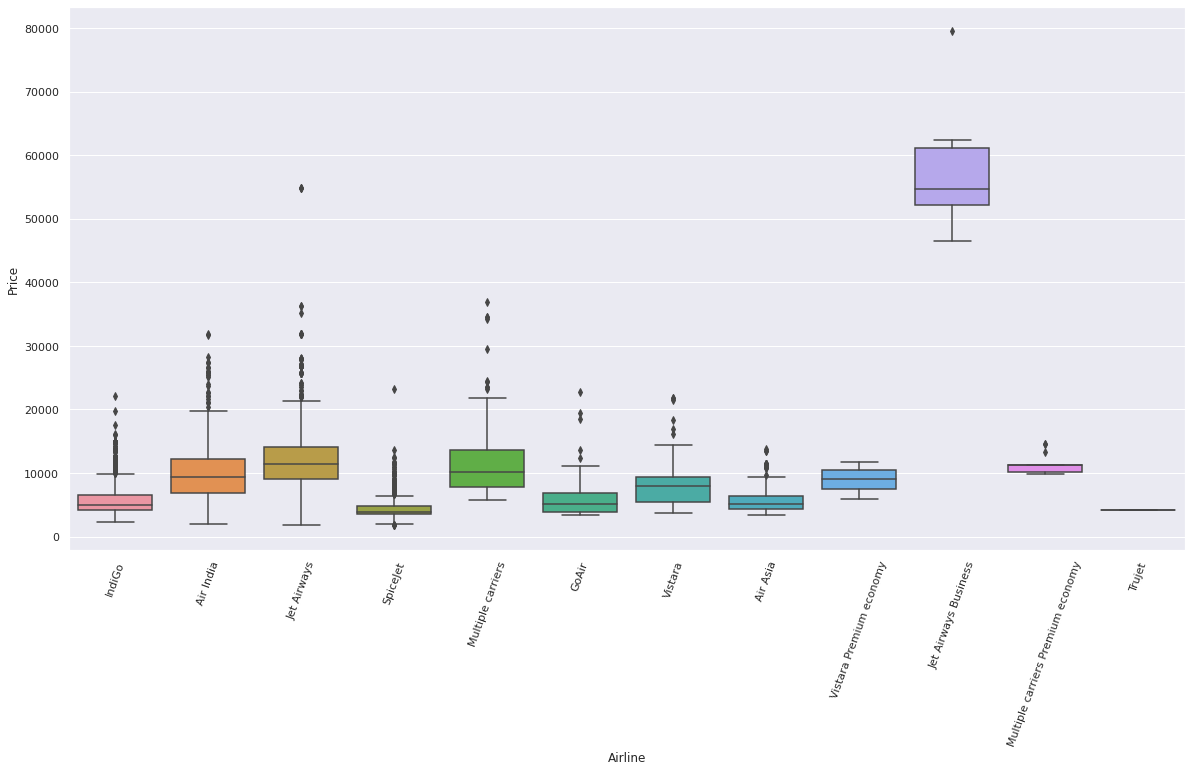

In [13]:
# airline vs price

print(df['Airline'].value_counts())

plt.figure(figsize=(20,10))
plt.xticks(rotation=70)
sns.boxplot(x='Airline', y='Price', data=df)

here, we can see that Jet Airways Business have the highest Price.Apart from the that almost all are having similar median

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:xlabel='Source', ylabel='Price'>

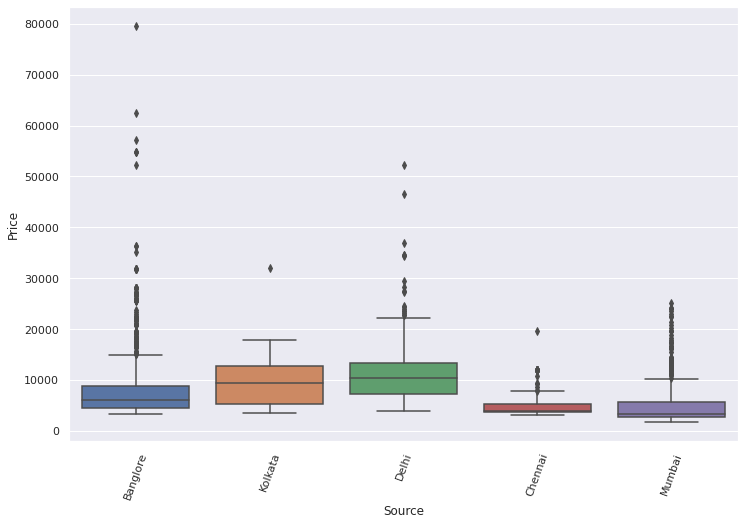

In [14]:
# source vs price

print(df['Source'].value_counts())

plt.figure(figsize=(12,8))
plt.xticks(rotation=70)
sns.boxplot(x='Source', y='Price', data=df)

In [15]:
train_df = pd.get_dummies(df, drop_first=True)

In [16]:
train_df.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,12,5,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
train_df.shape

(10682, 29)

In [18]:
# test set

test = pd.read_csv('datasets/flight_test.csv')

In [19]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [20]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [21]:
test['Journey_day'] = pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.day
test['Journey_month'] = pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.month
test['Dep_hour'] = pd.to_datetime(test.Dep_Time).dt.hour
test['Dep_min'] = pd.to_datetime(test.Dep_Time).dt.minute
test['Arrival_hour'] = pd.to_datetime(test.Arrival_Time).dt.hour
test['Arrival_min'] = pd.to_datetime(test.Arrival_Time).dt.minute

In [22]:
duration = list(test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
for i in range(len(duration)):
    h_min = int(duration[i].split('h')[0]) * 60
    min = int(duration[i].split(sep = "m")[0].split()[-1]) + h_min
    duration[i] = min
    
test['Duration'] = duration

In [23]:
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
test_df = test.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Route', 'Additional_Info'], axis=1)

In [24]:
test_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,655,1,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,240,1,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1425,1,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,780,1,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,170,0,24,6,23,55,2,45


In [25]:
test_df = pd.get_dummies(test_df, drop_first=True)

In [26]:
test_df.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,655,1,6,6,17,30,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
1,240,1,12,5,6,20,10,20,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1425,1,21,5,19,15,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,780,1,21,5,8,0,21,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,170,0,24,6,23,55,2,45,0,0,...,0,0,0,0,0,0,1,0,0,0


# Feature Selection

In [27]:
print(train_df.shape)
print(test_df.shape)

(10682, 29)
(2671, 27)


In [28]:
X = train_df.drop(['Price'], axis=1)
y = train_df['Price']

In [29]:
X.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,24,3,22,20,1,10,0,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,1,5,5,50,13,15,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,9,6,9,25,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
3,325,1,12,5,18,5,23,30,0,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1,1,3,16,50,21,35,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

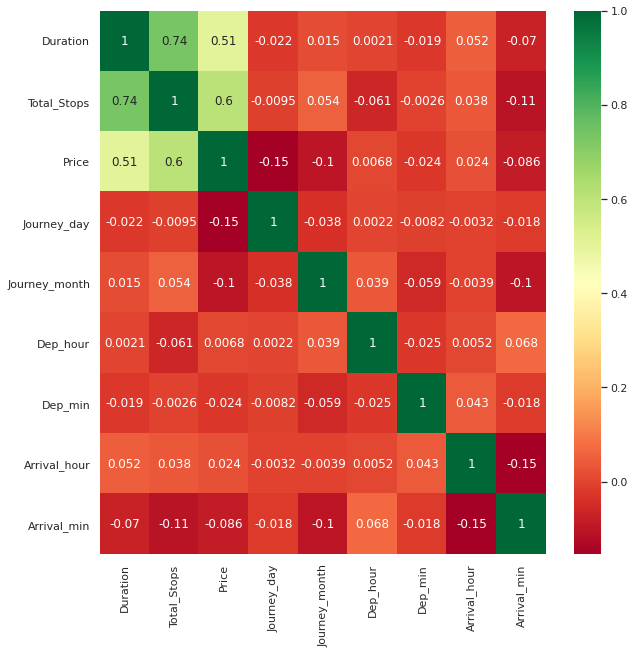

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X, y)

ExtraTreesRegressor()

In [37]:
print(et.feature_importances_)

[1.18528037e-01 2.40276897e-01 1.44732802e-01 5.34795151e-02
 2.71696166e-02 2.55038926e-02 2.95594982e-02 2.20514352e-02
 1.11404733e-02 1.95266442e-03 1.94871731e-02 1.33251732e-01
 6.75125009e-02 1.74409896e-02 7.82040323e-04 3.60118406e-03
 1.03192020e-04 4.96051368e-03 6.11942461e-05 4.47934158e-04
 9.75716232e-03 3.41353033e-03 5.80716121e-03 1.42964098e-02
 1.21398671e-02 7.30977311e-03 5.46286994e-04 2.46865235e-02]


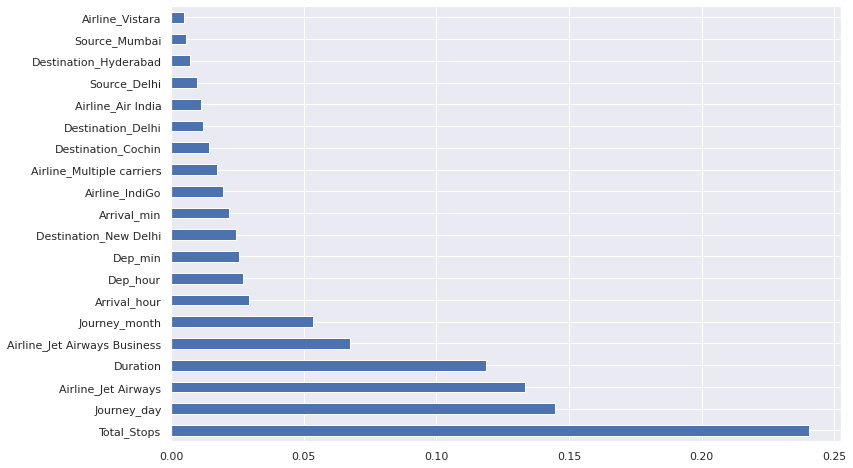

In [38]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(et.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
y_pred = reg_rf.predict(X_test)

In [42]:
reg_rf.score(X_train, y_train)

0.9532110599875984

In [43]:
reg_rf.score(X_test, y_test)

0.8218908617906355

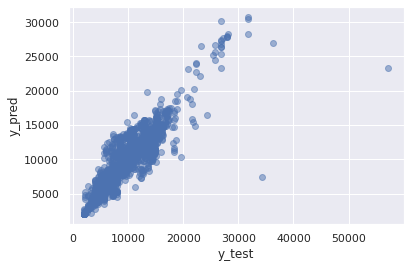

In [44]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1151.137015023569
MSE: 3840399.2699182327
RMSE: 1959.6936673669773


In [46]:
metrics.r2_score(y_test, y_pred)

0.8218908617906355

# Hyperparameter Tuning

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [49]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [50]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [51]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [53]:
prediction = rf_random.predict(X_test)

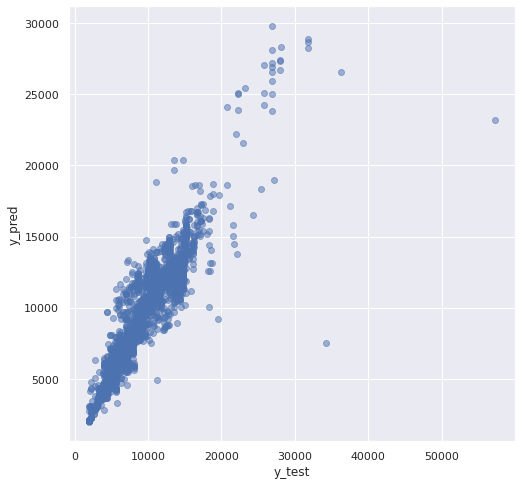

In [54]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1145.413204567514
MSE: 3571234.840350148
RMSE: 1889.7711079255466
